In [1]:
import pandas as pd

input_path = "./data/RAW/"
data = pd.read_csv(input_path + "sample_data.csv", index_col=0, parse_dates=[0])
labels = pd.read_csv(input_path + "label_data.csv", index_col=0, parse_dates=[0])

## Exercice 1
J'utile une boucle for pour manupuler un tableau Pandas. C'est sous-optimal. 

In [2]:
data_mean_list = []
for date_step in labels.index:
    
    data_window = data[date_step.strftime(format="%Y-%m-%d %H")]
    #print(data_window.index, '\n')
    data_mean_list.append(list(data_window.mean()))
    

In [3]:
import numpy as np

data_mean = pd.DataFrame(data_mean_list, dtype=np.float64,
                         index=labels.index, columns=data.columns)

data_mean.head()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
2017-04-01 00:00:00,363.833333,546.666667,515.666667,454.000000,368.666667,699.833333,635.166667,461.666667,318.833333,448.666667
2017-04-01 01:00:00,367.000000,573.333333,551.000000,435.333333,374.666667,687.833333,665.666667,406.833333,309.166667,398.166667
2017-04-01 02:00:00,504.666667,701.166667,586.833333,416.500000,565.666667,903.833333,679.500000,412.000000,330.833333,442.666667
2017-04-01 03:00:00,476.166667,928.000000,612.833333,445.000000,567.333333,933.166667,730.833333,574.166667,428.833333,529.833333
2017-04-01 04:00:00,582.500000,902.166667,609.833333,466.500000,608.833333,980.666667,829.166667,570.000000,508.166667,622.166667


In [4]:
print('shape of data_mean:', data_mean.shape)
print('shape of labels:', labels.shape)

shape of data_mean: (6336, 10)
shape of labels: (6336, 10)


## Exercice 2

## (a) Normalisation

La normalisation qui me semble la plus pertinente est de se ramener à des données de variances unitaires et moyennes nulles par batiment. Chaque batiement pouvant ansi être comparé aux autres dans un même espace de variation que ça soit une cabane de jardin ou une usine. 

In [5]:
print('data_mean.mean(): \n', data_mean.mean(), '\n')
print('data_mean.var(): \n', data_mean.var(), '\n')

print('mean ratio: ', data_mean.mean().max() / data_mean.mean().min())
print('var ratio: ', data_mean.var().max() / data_mean.var().min())

data_mean.mean(): 
 Bat1      588.383875
Bat2     1020.188229
Bat3      672.944971
Bat4      405.228733
Bat5      758.106064
Bat6     1046.209782
Bat7      871.721213
Bat8      658.021291
Bat9      495.478938
Bat10     651.512837
dtype: float64 

data_mean.var(): 
 Bat1     24960.519778
Bat2     97490.616014
Bat3     23497.115989
Bat4     12680.719269
Bat5     69907.679252
Bat6     79316.479780
Bat7     58837.156863
Bat8     27294.291807
Bat9     24623.964030
Bat10    29094.504536
dtype: float64 

mean ratio:  2.581775915248595
var ratio:  7.688098280794263


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(data_mean)
data_normalised_list = scaler.transform(data_mean)   

data_normalised = pd.DataFrame(data_normalised_list, dtype=np.float64,
                               index=labels.index, columns=data.columns)

data_normalised.head()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
2017-04-01 00:00:00,-1.421417,-1.516675,-1.026114,0.433138,-1.473030,-1.229988,-0.975303,-1.188610,-1.125792,-1.189311
2017-04-01 01:00:00,-1.401372,-1.431263,-0.795593,0.267359,-1.450336,-1.272600,-0.849553,-1.520538,-1.187399,-1.485399
2017-04-01 02:00:00,-0.529935,-1.021816,-0.561809,0.100100,-0.727890,-0.505581,-0.792519,-1.489262,-1.049314,-1.224490
2017-04-01 03:00:00,-0.710341,-0.295276,-0.392180,0.353209,-0.721586,-0.401418,-0.580874,-0.507604,-0.424744,-0.713422
2017-04-01 04:00:00,-0.037245,-0.378020,-0.411753,0.544151,-0.564615,-0.232745,-0.175450,-0.532827,0.080861,-0.172060


In [7]:
print('data_normalised.mean(): \n', data_normalised.mean(), '\n')
print('data_normalised.var(): \n', data_normalised.var())

data_normalised.mean(): 
 Bat1     1.103214e-16
Bat2     2.209933e-16
Bat3     3.263032e-16
Bat4    -3.199251e-16
Bat5     5.474880e-17
Bat6     8.458942e-16
Bat7    -3.702614e-16
Bat8    -6.665544e-17
Bat9     3.563367e-16
Bat10   -8.423265e-17
dtype: float64 

data_normalised.var(): 
 Bat1     1.000158
Bat2     1.000158
Bat3     1.000158
Bat4     1.000158
Bat5     1.000158
Bat6     1.000158
Bat7     1.000158
Bat8     1.000158
Bat9     1.000158
Bat10    1.000158
dtype: float64


# (b) Visualisation

In [8]:
def plot_results_classif(data, labels, Bat_name, start_date, end_date):
    window = (start_date < labels.index) & (labels.index < end_date)
    data = data[window][Bat_name]
    labels = labels[window][Bat_name]
    labels = labels * (data.max() - data.min()) + data.min()
    
    pd.concat([data, labels], axis=1, sort=False).plot()

In [9]:
import datetime as dt

start_date = dt.datetime(2017, 6, 1)
end_date = dt.datetime(2017, 6, 6)

plot_results_classif(data_normalised, labels, 'Bat3', start_date, end_date)
plot_results_classif(data_normalised, labels, 'Bat5', start_date, end_date)
plot_results_classif(data_normalised, labels, 'Bat9', start_date, end_date)

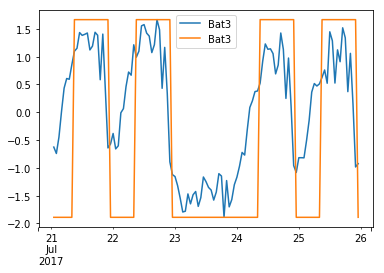

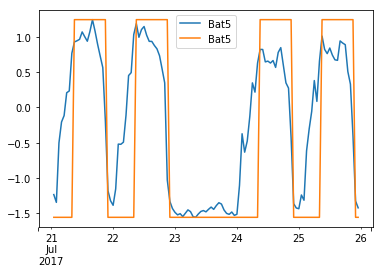

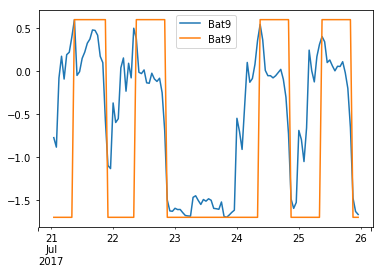

In [10]:
start_date = dt.datetime(2017, 7, 21)
end_date = dt.datetime(2017, 7, 26)

plot_results_classif(data_normalised, labels, 'Bat3', start_date, end_date)
plot_results_classif(data_normalised, labels, 'Bat5', start_date, end_date)
plot_results_classif(data_normalised, labels, 'Bat9', start_date, end_date)

### (b) methode 1

Pour obtenir les jours fériés j'ai d'abord pensé à calculer les consomations moyennes par jour et à estimer un seuil. 

In [11]:
from collections import OrderedDict

days_list = [hour.replace(hour=0).strftime(format="%Y-%m-%d") for hour in labels.index]
days_list = list(OrderedDict.fromkeys(days_list))

dict_day_dayOff_1 = {}
for day in days_list:
    data_window = data_normalised[day]
    #print(data_window.index, '\n')
    
    consuption = data_window.mean().mean()   
    dict_day_dayOff_1[day] = consuption < -0.65

day_off_1 = [dict_day_dayOff_1[hour.strftime(format="%Y-%m-%d")] for hour in labels.index]
    
day_off_df_1 = pd.DataFrame(day_off_1, dtype = bool, 
                            columns=['day_off'], index=labels.index)

day_off_df_1.head()

,day_off
2017-04-01 00:00:00,False
2017-04-01 01:00:00,False
2017-04-01 02:00:00,False
2017-04-01 03:00:00,False
2017-04-01 04:00:00,False


In [12]:
print('number of hours during wich buildings are open during a day off according to method 1: ',
      (day_off_df_1['day_off']).sum())

number of hours during wich buildings are open during a day off according to method 1:  792


J'ai aussi utilisé la base labels pour estimer les jours fériés. Le batiment 4 est le seul à être ouvert 5 heures les dimanches. Je vais estimer qu'un jour est férié si les batiments sont ouverts moins de 20h cumulées. 

### (b) methode 2


In [13]:
dict_day_dayOff_2 = {}
for day in days_list:
    dict_day_dayOff_2[day] = (labels[day].sum().sum() < 20)
    
day_off_2 = [dict_day_dayOff_2[hour.strftime(format="%Y-%m-%d")] for hour in labels.index]
    
day_off_df_2 = pd.DataFrame(day_off_2, dtype = bool, 
                            columns=['day_off'], index=labels.index)

In [14]:
print('number of hours during wich buildings are open during a day off according to method 1: ',
      (day_off_df_2['day_off']).sum())

number of hours during wich buildings are open during a day off according to method 1:  744


In [15]:
print('number of days of disagreemeent between the two methods: ', 
      int((day_off_df_2 != day_off_1).sum() / 24))

number of days of disagreemeent between the two methods:  2


 La méthode 2 semble légérement plus fiable que la première mais elle repose sur l'utilisation des labels. Je vais intégrer day_off_2 à data_normalised

In [16]:
data_normalised_2 = pd.concat([data_normalised, day_off_df_2], axis=1, sort=False)
data_normalised_2.head()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10,day_off
2017-04-01 00:00:00,-1.421417,-1.516675,-1.026114,0.433138,-1.473030,-1.229988,-0.975303,-1.188610,-1.125792,-1.189311,False
2017-04-01 01:00:00,-1.401372,-1.431263,-0.795593,0.267359,-1.450336,-1.272600,-0.849553,-1.520538,-1.187399,-1.485399,False
2017-04-01 02:00:00,-0.529935,-1.021816,-0.561809,0.100100,-0.727890,-0.505581,-0.792519,-1.489262,-1.049314,-1.224490,False
2017-04-01 03:00:00,-0.710341,-0.295276,-0.392180,0.353209,-0.721586,-0.401418,-0.580874,-0.507604,-0.424744,-0.713422,False
2017-04-01 04:00:00,-0.037245,-0.378020,-0.411753,0.544151,-0.564615,-0.232745,-0.175450,-0.532827,0.080861,-0.172060,False


## exercice 3

In [17]:
df_list = [pd.concat(
    [pd.DataFrame({'Bat': [num] * labels.shape[0]}, index=labels.index),
     day_off_df_2,
     data_normalised['Bat' + str(num)].rename('value'), 
     labels['Bat' + str(num)].rename('labels')
    ], axis=1, sort=False)
           for num in range(1,11)]

In [18]:
df = pd.concat(df_list, axis=0)
df.shape

(63360, 4)

In [19]:
df.head()

,Bat,day_off,value,labels
2017-04-01 00:00:00,1,False,-1.421417,0
2017-04-01 01:00:00,1,False,-1.401372,0
2017-04-01 02:00:00,1,False,-0.529935,0
2017-04-01 03:00:00,1,False,-0.710341,0
2017-04-01 04:00:00,1,False,-0.037245,0


In [20]:
output_path = './data/processed/data.csv'
df.to_csv(output_path)

In [21]:
try:
    assert True == False
except AssertionError:
    print("L'année saisie est inférieure ou égale à 0.")
    
print('hello')

L'année saisie est inférieure ou égale à 0.
hello


## exercice 4

Je vais découper les données par jour et par batiment comme montré si dessus

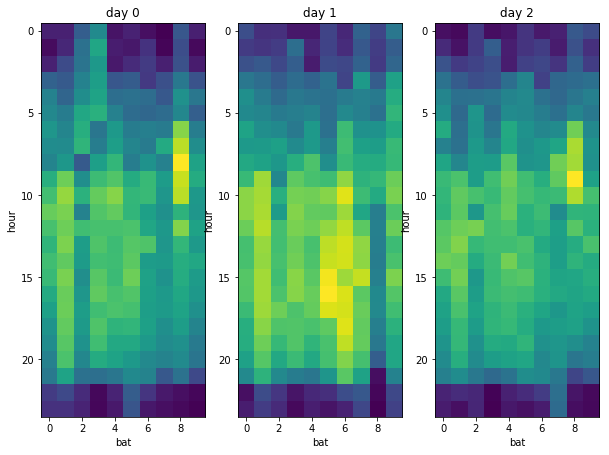

In [22]:
from Visualize import visualise_batch_input

visualise_batch_input()

Voila ce que je vais utiliser comme entrée si batch_size = 3. Dans un premier temps je n'utilise pas day_off. 

La méthode la plus naturelle pour traiter ce type de données temprelles c'est un RNN. Comme les entrée sont de tailles fixes je vais commencer avec un CNN mono-dimensionel sr la dimension temprelle qui devrait extraire les dépendances temprelles. 

In [38]:
from sklearn.model_selection import train_test_split
from variables import Variables
from reader import Data
import datetime
import os

from models.RNN_1 import model

V = Variables()

days_list = V.days_list
days_list_train, days_list_test, _, _ = train_test_split(days_list, days_list, test_size=0.2, random_state=666)
days_list_test, days_list_valid, _, _ = train_test_split(days_list_test, days_list_test, test_size=0.5,
                                                         random_state=666)

expand_dims = False       # si RNN ou CNN
data_train = Data('./data/processed/data.csv', days_list_train, expand_dims=expand_dims)
data_test = Data('./data/processed/data.csv', days_list_test, expand_dims=expand_dims)
data_valid = Data('./data/processed/data.csv', days_list_valid, expand_dims=expand_dims)

now = datetime.datetime.now().replace(microsecond=0)
name = datetime.date.today().isoformat() + '-' + now.strftime("%H-%M-%S")
os.makedirs('./experiments/' + name)

learning_rate = 1e-3
loss = 'categorical_crossentropy'
batch_size = 4
epoch = 1
steps_per_epoch = 30

gen_train = data_train.generator(batch_size)
gen_validation = data_train.generator(len(days_list_valid))
valid = gen_validation.__next__()

model = model()

model.compile(loss=loss, optimizer='Adam')

model.fit_generator(gen_train,
                      epochs=epoch,
                      validation_data=valid,
                      steps_per_epoch=steps_per_epoch)

Epoch 1/1
30/30 [==============================] - 15s 491ms/step - loss: nan - val_loss: nan


l'entrainement du modèle disfonctionne: Au bout de quelques batch la fonction de cout ne produit que des valeurs vides nan. 